In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv('../data/datathon_data.csv')

data = data.drop('BELNR', axis=1)
data = data.drop('BUKRS', axis=1)
# OneHotEncode categorical features
categorical_features = ['WAERS', 'KTOSL', 'PRCTR', 'BSCHL', 'HKONT']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(data[categorical_features])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Drop the original categorical columns and concatenate the encoded columns
data = data.drop(categorical_features, axis=1)
data = pd.concat([data, encoded_df], axis=1)

X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 positional arguments (and 1 keyword-only argument) were given

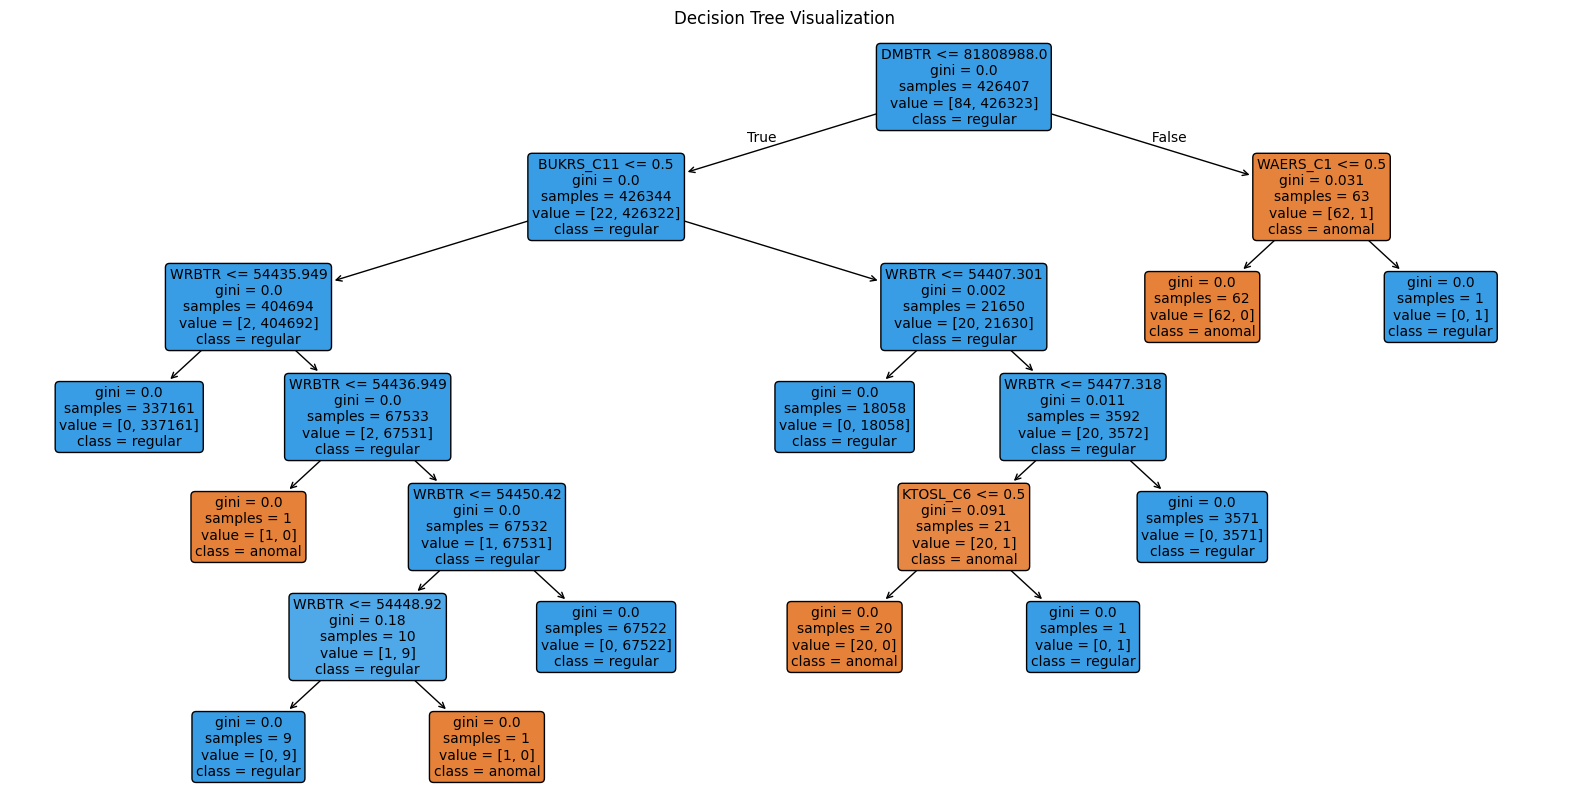

In [9]:
# Add these imports at the top of your notebook
import matplotlib.pyplot as plt
from sklearn import tree
import matplotlib.pyplot as plt

# After training the model and calculating accuracy, add this code:

# Visualize the decision tree
plt.figure(figsize=(20,10))  # Set the figure size (adjust as needed)

# Plot the tree
tree.plot_tree(clf, 
               feature_names=X.columns,  
               class_names=[str(c) for c in clf.classes_],
               filled=True,
               rounded=True,
               fontsize=10)

plt.title("Decision Tree Visualization")
plt.savefig('decision_tree.png', dpi=300, bbox_inches='tight')  # Optional: save as image file
plt.show()